In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
import numpy as np
import os

In [2]:
try:
    os.system("rm -rf ./build/*")
except:
    pass
os.system("cmake -S . -B ./build/")
os.system("cmake --build /Users/benjaminfry/Code/fall_2022/apmth207/homework_2/build --target homework_2 -j 6 ")

-- The C compiler identification is AppleClang 14.0.0.14000029
-- The CXX compiler identification is AppleClang 14.0.0.14000029
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /Library/Developer/CommandLineTools/usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /Library/Developer/CommandLineTools/usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Configuring done
-- Generating done
-- Build files have been written to: /Users/benjaminfry/Code/fall_2022/apmth207/homework_2/build
[ 50%] Building CXX object CMakeFiles/homework_2.dir/main.cpp.o
[100%] Linking CXX executable homework_2
[100%] Built target homework_2


0

In [3]:
N = 500
os.chdir("./build/")
os.system(f"./homework_2 {N}")
os.chdir("..")

writing: SEIR_N_500_run_1.csv
writing: SEIR_N_500_run_2.csv
writing: SEIR_N_500_run_3.csv
writing: SEIR_N_500_run_4.csv
writing: SEIR_N_500_run_5.csv
writing: SEIR_N_500_run_6.csv
writing: SEIR_N_500_run_7.csv
writing: SEIR_N_500_run_8.csv
writing: SEIR_N_500_run_9.csv
writing: SEIR_N_500_run_10.csv


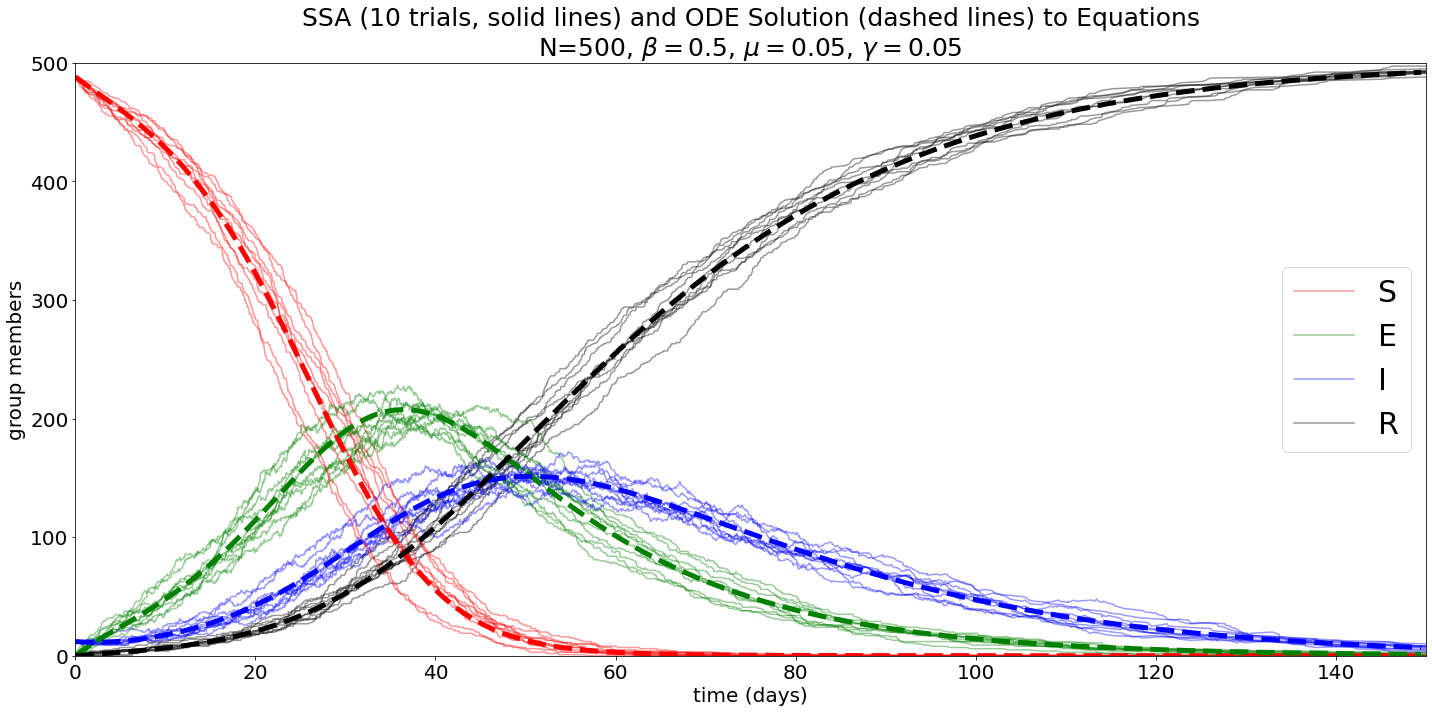

In [4]:
### Plot SSA Runs
n_default_ssa_steps = []
for i in range(1, 11):
    df = pd.read_csv(f"./build/SEIR_N_500_run_{i}.csv", header=None)
    plt.plot(df[0], df[1], 'r', alpha=0.4)
    plt.plot(df[0], df[2], 'g', alpha=0.4)
    plt.plot(df[0], df[3], 'b', alpha=0.4)
    plt.plot(df[0], df[4], 'k', alpha=0.4)
    plt.axis([0, 150, 0, 500])
    plt.xlabel("time (days)", fontsize=20)
    plt.ylabel("group members", fontsize=20)
    n_default_ssa_steps.append(len(df[0]))
    
# Compute and plot ODE runs.
def ode_system(statevec, t, c1, c2, c3):
    S,E,I,R = statevec
    dydt = [-c1 * S * I, (c1 * S * I) - (c2 * E), (c2 * E) - (c3 * I), (c3 * I)]
    return dydt

ts = np.arange(0, 150, 0.5)
N = 500

consts = (0.5/N, 0.05, 0.05)
# S, E, I, R
init_conds = [488, 0, 12, 0]
sol = odeint(ode_system, init_conds, ts, args=consts)

plt.plot(ts, sol[:, 0], 'r--', linewidth=5)
plt.plot(ts, sol[:, 1], 'g--', linewidth=5)
plt.plot(ts, sol[:, 2], 'b--', linewidth=5)
plt.plot(ts, sol[:, 3], 'k--', linewidth=5)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(["S", "E", "I", "R"], fontsize=30)

plt.gcf().set_size_inches(20, 10)
plt.title("SSA (10 trials, solid lines) and ODE Solution (dashed lines) to Equations\nN=500, $\\beta=0.5$, $\\mu=0.05$, $\\gamma=0.05$", fontsize=25)
plt.tight_layout()
plt.savefig("seir_trajectories.jpg")

writing: SEIR_N_500_run_1.csv
writing: SEIR_N_500_run_2.csv
writing: SEIR_N_500_run_3.csv
writing: SEIR_N_500_run_4.csv
writing: SEIR_N_500_run_5.csv
writing: SEIR_N_500_run_6.csv
writing: SEIR_N_500_run_7.csv
writing: SEIR_N_500_run_8.csv
writing: SEIR_N_500_run_9.csv
writing: SEIR_N_500_run_10.csv
writing: SEIR_N_5000_run_1.csv
writing: SEIR_N_5000_run_2.csv
writing: SEIR_N_5000_run_3.csv
writing: SEIR_N_5000_run_4.csv
writing: SEIR_N_5000_run_5.csv
writing: SEIR_N_5000_run_6.csv
writing: SEIR_N_5000_run_7.csv
writing: SEIR_N_5000_run_8.csv
writing: SEIR_N_5000_run_9.csv
writing: SEIR_N_5000_run_10.csv
writing: SEIR_N_50000_run_1.csv
writing: SEIR_N_50000_run_2.csv
writing: SEIR_N_50000_run_3.csv
writing: SEIR_N_50000_run_4.csv
writing: SEIR_N_50000_run_5.csv
writing: SEIR_N_50000_run_6.csv
writing: SEIR_N_50000_run_7.csv
writing: SEIR_N_50000_run_8.csv
writing: SEIR_N_50000_run_9.csv
writing: SEIR_N_50000_run_10.csv
writing: SEIR_N_500000_run_1.csv
writing: SEIR_N_500000_run_2.csv
w

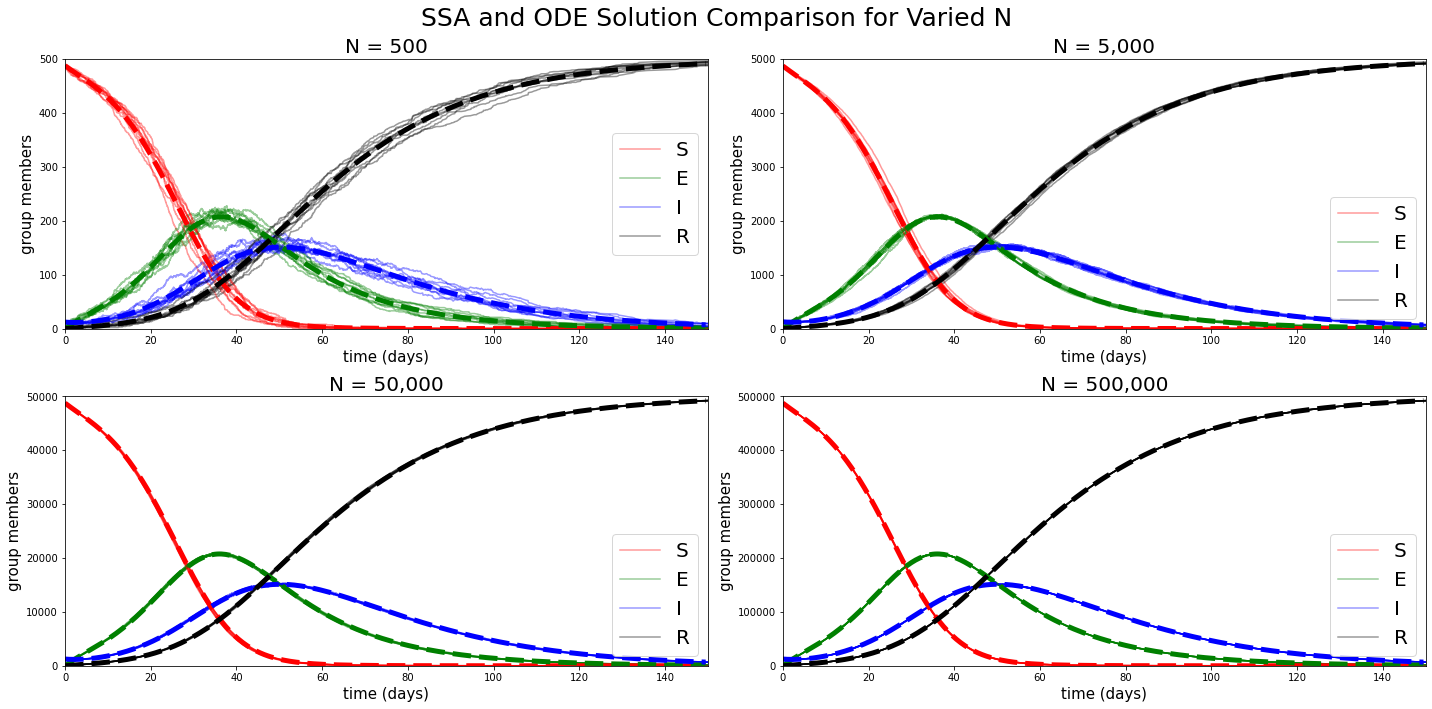

In [5]:
def compute_ode_solution(N, ts):
    N_i = N // (100 / 2.5) # Computes (floor) of 2.5% of N similar to how the C++ will compute it.
    N_s = N - N_i
    
    consts = (0.5/N, 0.05, 0.05)
    # S, E, I, R
    init_conds = [N_s, 0, N_i, 0]
    return odeint(ode_system, init_conds, ts, args=consts)

def compute_ssa_solution(N):
    os.chdir("./build/")
    os.system(f"./homework_2 {N}")
    os.chdir("..")
    return [pd.read_csv(f"./build/SEIR_N_{N}_run_{x}.csv", header=None) for x in range(1, 11)]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
axs = [ax1, ax2, ax3, ax4]
for n, ax in zip([500, 5000, 50000, 500_000], axs):
    ts = np.arange(0, 150, 0.5)
    sol = compute_ode_solution(n, ts)
    dfs = compute_ssa_solution(n)
    
    for idx, df in zip(range(1, 11), dfs):
        ax.plot(df[0], df[1], 'r', alpha=0.4)
        ax.plot(df[0], df[2], 'g', alpha=0.4)
        ax.plot(df[0], df[3], 'b', alpha=0.4)
        ax.plot(df[0], df[4], 'k', alpha=0.4)
        ax.axis([0, 150, 0, n])
        
    ax.plot(ts, sol[:, 0], 'r--', linewidth=5)
    ax.plot(ts, sol[:, 1], 'g--', linewidth=5)
    ax.plot(ts, sol[:, 2], 'b--', linewidth=5)
    ax.plot(ts, sol[:, 3], 'k--', linewidth=5)
    
    ax.set_xlabel("time (days)", fontsize=15)
    ax.set_ylabel("group members", fontsize=15)
    ax.set_title(f"N = {n:,}", fontsize=20)
    ax.legend(["S", "E", "I", "R"], fontsize=20)
fig.set_size_inches(20, 10)
plt.suptitle("SSA and ODE Solution Comparison for Varied N", fontsize=25)
plt.tight_layout()
plt.savefig("ODEvsSSAvariedN.jpg")

writing: SEIR_Ni_1_run_1.csv
writing: SEIR_Ni_1_run_2.csv
writing: SEIR_Ni_1_run_3.csv
writing: SEIR_Ni_1_run_4.csv
writing: SEIR_Ni_1_run_5.csv
writing: SEIR_Ni_1_run_6.csv
writing: SEIR_Ni_1_run_7.csv
writing: SEIR_Ni_1_run_8.csv
writing: SEIR_Ni_1_run_9.csv
writing: SEIR_Ni_1_run_10.csv
writing: SEIR_Ni_1_run_11.csv
writing: SEIR_Ni_1_run_12.csv
writing: SEIR_Ni_1_run_13.csv
writing: SEIR_Ni_1_run_14.csv
writing: SEIR_Ni_1_run_15.csv
writing: SEIR_Ni_1_run_16.csv
writing: SEIR_Ni_1_run_17.csv
writing: SEIR_Ni_1_run_18.csv
writing: SEIR_Ni_1_run_19.csv
writing: SEIR_Ni_1_run_20.csv
writing: SEIR_Ni_1_run_21.csv
writing: SEIR_Ni_1_run_22.csv
writing: SEIR_Ni_1_run_23.csv
writing: SEIR_Ni_1_run_24.csv
writing: SEIR_Ni_1_run_25.csv
writing: SEIR_Ni_1_run_26.csv
writing: SEIR_Ni_1_run_27.csv
writing: SEIR_Ni_1_run_28.csv
writing: SEIR_Ni_1_run_29.csv
writing: SEIR_Ni_1_run_30.csv
writing: SEIR_Ni_1_run_31.csv
writing: SEIR_Ni_1_run_32.csv
writing: SEIR_Ni_1_run_33.csv
writing: SEIR_Ni_1_

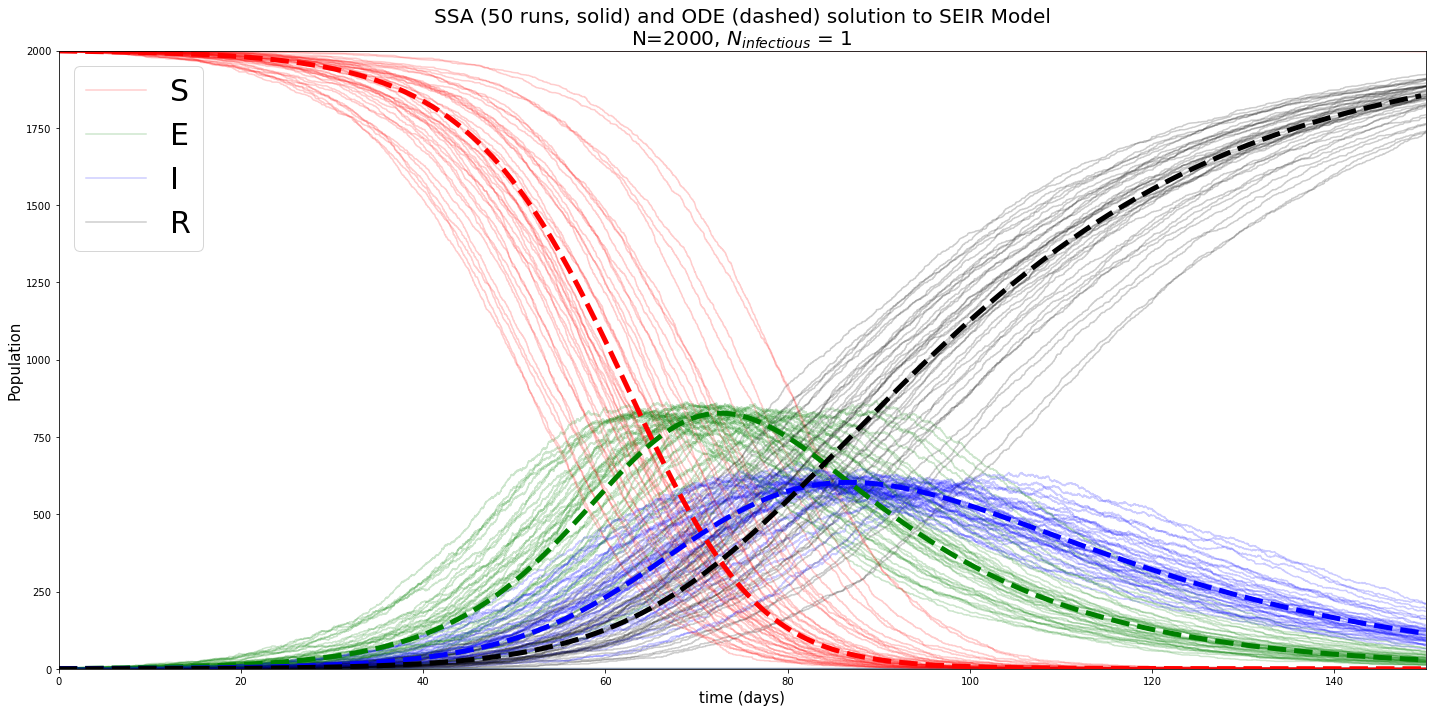

In [6]:
def compute_single_infected_ssa(N):
    os.chdir("./build/")
    os.system(f"./homework_2")
    os.chdir("..")
    return [pd.read_csv(f"./build/SEIR_Ni_1_run_{x}.csv", header=None) for x in range(1, 51)]

N = 2000
N_i = 1

dfs = compute_single_infected_ssa(N)
for idx, df in zip(range(1, 51), dfs):
    plt.plot(df[0], df[1], 'r', alpha=0.2)
    plt.plot(df[0], df[2], 'g', alpha=0.2)
    plt.plot(df[0], df[3], 'b', alpha=0.2)
    plt.plot(df[0], df[4], 'k', alpha=0.2)

N_s = N - N_i
consts = (0.5/N, 0.05, 0.05)
# S, E, I, R
init_conds = [N_s, 0, N_i, 0]
sol = odeint(ode_system, init_conds, ts, args=consts)
plt.plot(ts, sol[:, 0], 'r--', linewidth=5)
plt.plot(ts, sol[:, 1], 'g--', linewidth=5)
plt.plot(ts, sol[:, 2], 'b--', linewidth=5)
plt.plot(ts, sol[:, 3], 'k--', linewidth=5)
plt.gcf().set_size_inches(20, 10)

plt.xlabel("time (days)", fontsize=15)
plt.ylabel("Population", fontsize=15)
plt.axis([0,150,0,N])
plt.legend(["S", "E", "I", "R"], fontsize=30)
plt.title(r"SSA (50 runs, solid) and ODE (dashed) solution to SEIR Model" + "\n" + r"N=2000, $N_{infectious}$ = 1", fontsize=20)
plt.tight_layout()
plt.savefig("ODEvsSSASmallInfectedInit.jpg")

writing: tau_0.001_leaping.csv
writing: tau_0.01_leaping.csv
writing: tau_0.1_leaping.csv
writing: tau_1_leaping.csv
writing: tau_10_leaping.csv


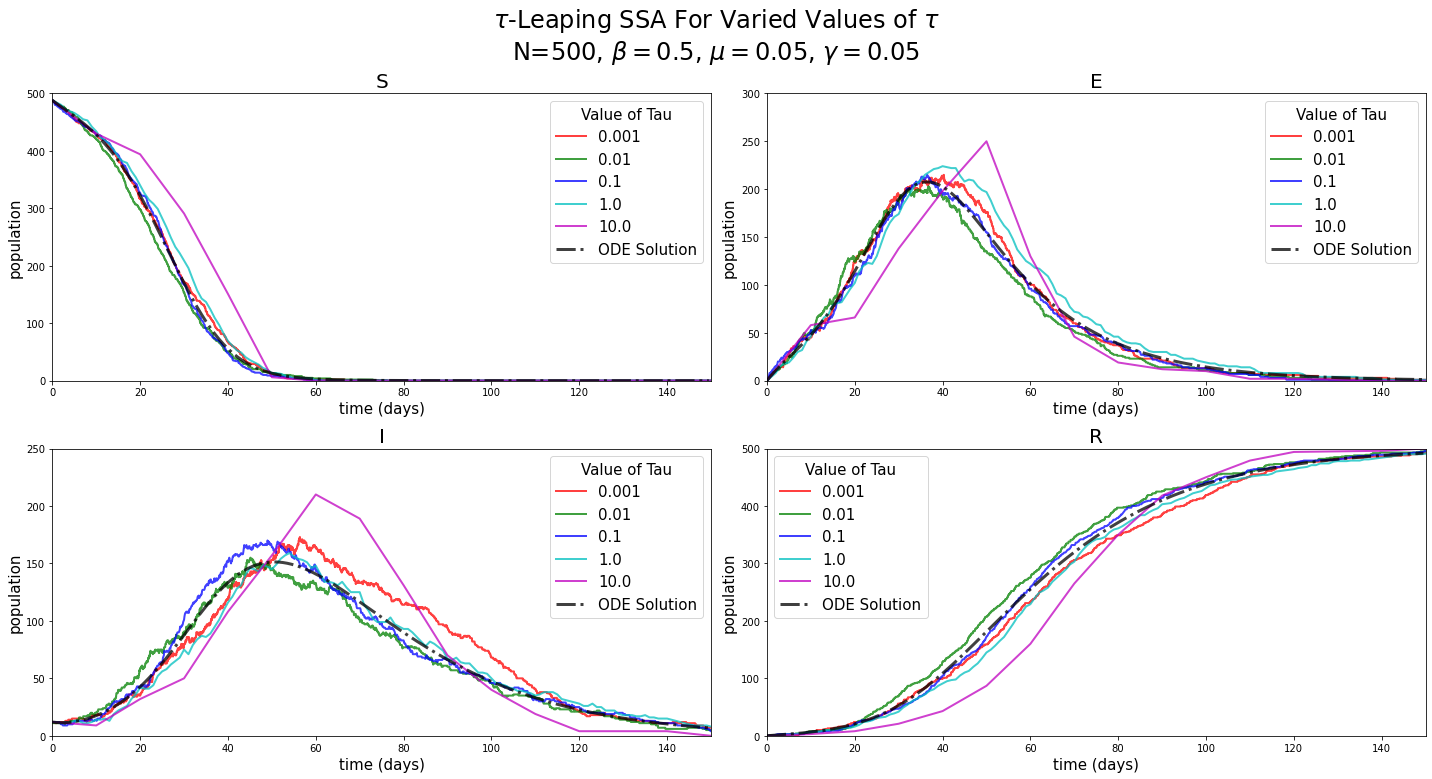

In [7]:
def run_tau_leaping():
    os.chdir("./build/")
    os.system(f"./homework_2 1 2 3")
    files = [x for x in os.listdir() if "tau" in x]
    out = [(float(x.split("_")[1]), pd.read_csv(x, header=None)) for x in files]
    os.chdir("..")
    return out
out = sorted(run_tau_leaping(), key=lambda x: x[0])

n_tau_leaping_steps = []
cols = ["r", "g", "b", "c", "m"]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
for (tau, df), col in zip(out, cols):
    ax1.plot(df[0], df[1], '-', alpha=0.75, linewidth=2, color=col, label=tau)
    ax1.axis([0, 150, 0, 500])
    ax2.plot(df[0], df[2], '-', alpha=0.75, linewidth=2, color=col, label=tau)
    ax2.axis([0, 150, 0, 300])
    ax3.plot(df[0], df[3], '-', alpha=0.75, linewidth=2, color=col, label=tau)
    ax3.axis([0, 150, 0, 250])
    ax4.plot(df[0], df[4], '-', alpha=0.75, linewidth=2, color=col, label=tau)
    ax4.axis([0, 150, 0, 500])
    n_tau_leaping_steps.append((tau, len(df[0])))

ts = np.arange(0, 150, 0.5)
sol = compute_ode_solution(500, ts)

for ax, idx, title in zip([ax1, ax2, ax3, ax4], range(4), ["S", "E", "I", "R"]):
    ax.plot(ts, sol[:, idx], "-.", alpha=0.75, linewidth=3, color="k", label="ODE Solution")
    ax.legend(title="Value of Tau", fontsize=15, title_fontsize=15)
    ax.set_title(title, fontsize=20)
    ax.set_xlabel("time (days)", fontsize=15)
    ax.set_ylabel("population", fontsize=15)

plt.gcf().set_size_inches(20, 11)
plt.suptitle(r"$\tau$-Leaping SSA For Varied Values of $\tau$" + "\n" + r"N=500, $\beta=0.5$, $\mu=0.05$, $\gamma=0.05$", fontsize=24)
plt.tight_layout()
plt.savefig("Varied_tau_comparison.jpg")

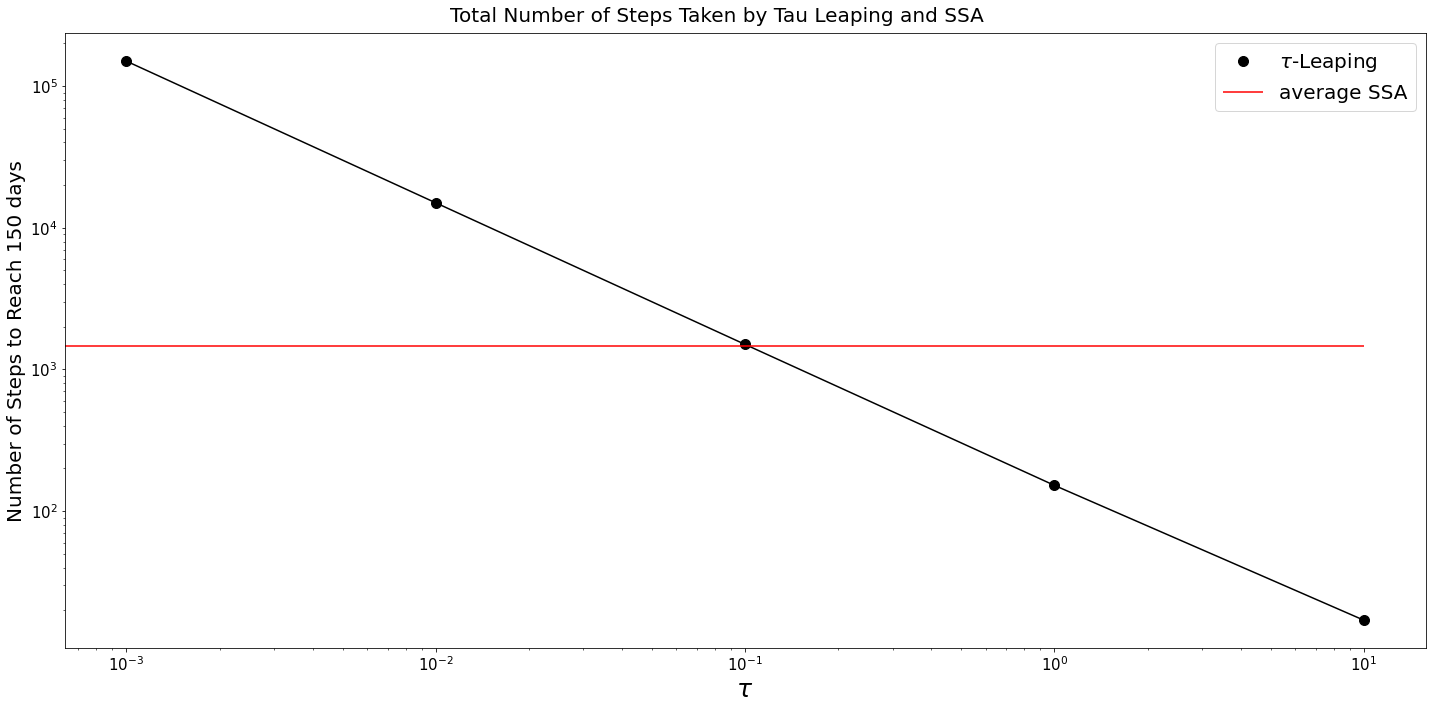

In [8]:
average_default = np.mean(n_default_ssa_steps)
xs = [x[0] for x in n_tau_leaping_steps]
ys = [x[1] for x in n_tau_leaping_steps]

plt.plot(xs, ys, 'ok', markersize=10, label=r"$\tau$-Leaping")
plt.plot(xs, ys, '-k')
plt.hlines(average_default, 0, 10, 'r', label="average SSA")

plt.yscale("log")
plt.xscale("log")
plt.gcf().set_size_inches(20, 10)

plt.xlabel(r"$\tau$", fontsize=25)
plt.ylabel("Number of Steps to Reach 150 days", fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=20)
plt.suptitle("Total Number of Steps Taken by Tau Leaping and SSA", fontsize=20)

plt.tight_layout()
plt.savefig("StepsTakenComparison.jpg")